In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2_contingency
import scipy.special as scsp
from scipy.stats import ksone

### Leitura do dataset

In [2]:
lista_espera = pd.read_csv('resultado_lista_de_espera.csv')
lista_espera.drop('Unnamed: 0', axis=1, inplace=True)

# Medidas de Tendência Central

In [3]:
def media_notas_por_atributo(dataset, atributo):
    atributos = np.unique(dataset[atributo])
    media_atrib = {}
    for atrib in atributos:
        media_atrib[atrib] = np.mean(dataset['Nota'][dataset[atributo] == atrib])
    return media_atrib

def media_classificados_atributo(dataset, atributo):
    classificados = pd.concat([dataset[dataset['Situação'] == 'CLASSIFICADO'], dataset[dataset['Situação'] == 'CLASSIFICADO NA AC']])
    atributos = np.unique(lista_espera[atributo])
    media_classificados_atrib = {}
    for atrib in atributos:
        media_classificados_atrib[atrib] = np.mean(classificados['Nota'][classificados[atributo] == atrib])
    
    return media_classificados_atrib

In [4]:
def medidas_tendencia_central(dataset):
    def mediana(dataset):
        notas_ordenadas = sorted(dataset['Nota'])
        return (notas_ordenadas[int(len(notas_ordenadas)/2)-1]+notas_ordenadas[int(len(notas_ordenadas)/2)])/2
    
    media_por_curso = media_notas_por_atributo(dataset, 'Curso')
    media_classif_curso = media_classificados_atributo(dataset, 'Curso')
    media_por_unidade = media_notas_por_atributo(dataset, 'Unidade')
    media_classif_unidade = media_classificados_atributo(dataset, 'Unidade')
    sep = '*'*40
    classificados = pd.concat([dataset[dataset['Situação'] == 'CLASSIFICADO'], dataset[dataset['Situação'] == 'CLASSIFICADO NA AC']])
    
    print('\n\n{} MÉDIA ARITMÉTICA {}\n\nMédia das notas dos classificados entre cursos:\n{}\n\nMédia das notas dos classificados entre as unidades:\n{}'.format(sep, sep, media_classif_curso, media_classif_unidade))
    print('\n\n{} MEDIANA {}\n\nMediana das notas em geral: {}\nMediana das notas dos classificados: {}'.format(sep, sep, mediana(dataset), mediana(classificados)))
    print('\n\n{} NOTAS MÁXIMA E MÍNIMA {}\n\nNota máxima: {}\nNota mínima: {}'.format(sep, sep, max(dataset['Nota']), min(dataset['Nota'])))

### Resultados

In [5]:
medidas_tendencia_central(lista_espera)



**************************************** MÉDIA ARITMÉTICA ****************************************

Média das notas dos classificados entre cursos:
{'Administração': 652.0701639344261, 'Agronomia': 597.3422641509435, 'Análise e Desenvolvimento de Sistemas': 588.1752380952381, 'Arquitetura e Urbanismo': 678.7317647058824, 'Biblioteconomia': 604.0924137931036, 'Biotecnologia': 665.6691666666667, 'Cinema e Audiovisual': 648.7725, 'Ciência da Computação': 620.7372549019608, 'Ciência de Dados': 560.1930434782608, 'Ciências Ambientais': 603.4980952380952, 'Ciências Atuariais': 621.8171428571429, 'Ciências Biológicas - Bacharelado': 657.4344444444445, 'Ciências Biológicas - Licenciatura': 652.26625, 'Ciências Contábeis': 639.8805, 'Ciências Econômicas': 644.5202857142856, 'Ciências Sociais – Bacharelado': 607.644, 'Ciências Sociais – Licenciatura': 602.0186666666667, 'Comunicação Social - Publicidade e Propaganda': 670.988, 'Dança – Bacharelado': 579.2583333333333, 'Dança – Licenciatura': 5

# Boxplot

### Boxplot das notas

In [6]:
def boxplot(entrada):
    plt.boxplot(np.array(list(entrada)))
    plt.show()


	BOXPLOT DAS NOTAS MÉDIAS POR CURSO


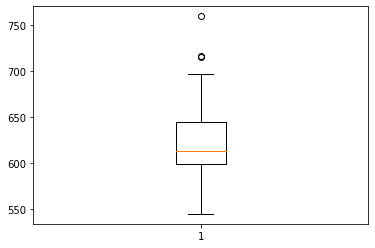

In [7]:
media_por_curso = media_notas_por_atributo(lista_espera, 'Curso')
media_classif_curso = media_classificados_atributo(lista_espera, 'Curso')
media_por_unidade = media_notas_por_atributo(lista_espera, 'Unidade')
media_classif_unidade = media_classificados_atributo(lista_espera, 'Unidade')

print('\n\tBOXPLOT DAS NOTAS MÉDIAS POR CURSO')
boxplot_curso = boxplot(media_classif_curso.values())


	BOXPLOT DAS NOTAS MÉDIAS POR UNIDADE


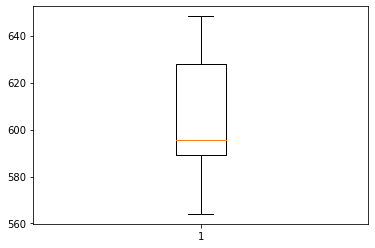

In [8]:
print('\n\tBOXPLOT DAS NOTAS MÉDIAS POR UNIDADE')
boxplot_unidade = boxplot(media_classif_unidade.values())

# Histogramas

### Histograma da frequência de candidaturas por concorrência

In [9]:
def histograma_categoria(dataset, attr_categoria):    
    distribuicao_frequencia = dataset[attr_categoria].value_counts()
    
    # tabela de frequência
    print('\n\n{}\n\nTabela de Frequência'.format('*'*100))
    display(pd.DataFrame(distribuicao_frequencia))
    
    # histograma
    print('\n\n{}\n\nHistograma Original \n'.format('*'*100))
    original_hist = plt.barh(np.array(distribuicao_frequencia.keys()), distribuicao_frequencia.values)
    plt.xlabel('Quantidade de candidatos')
    plt.ylabel('Categoria da concorrência')
    plt.title('Distribuição de frequência por categoria')
    plt.show()
    
    # constructing bars with log value to see the bar of categories which has not appeared so frequently
    print('\n\n{}\n\nHistograma com Log \n'.format('*'*100))
    log_values = np.log(distribuicao_frequencia.values)
    plt.xlabel('Quantidade de candidatos na escala log')
    plt.ylabel('Categoria da concorrência')
    plt.title('Distribuição de frequência por categoria')
    log_hist = plt.barh(np.array(distribuicao_frequencia.keys()), log_values)
    plt.show()



****************************************************************************************************

Tabela de Frequência


,Categoria Concorrência
Ampla Concorrência,26458
L2,6089
L1,3444
L6,3311
L5,2817
L10,65
L13,35
L9,34
L14,34




****************************************************************************************************

Histograma Original 



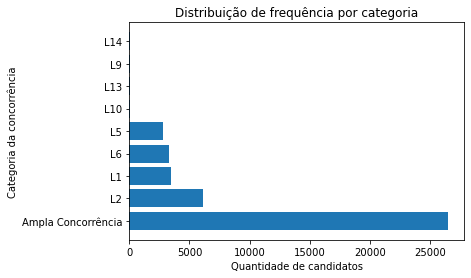



****************************************************************************************************

Histograma com Log 



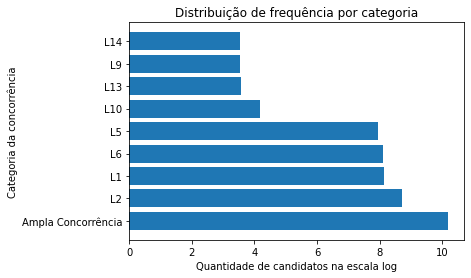

In [10]:
histograma_categoria(lista_espera, 'Categoria Concorrência')

### Histograma de frequência das notas entre os alunos classificados

In [11]:
def histograma_notas_classificados(dataset, atrib_notas, atrib_situacao):    
    classificados = dataset[[atrib_notas, atrib_situacao]][dataset[atrib_situacao] == 'CLASSIFICADO']
    nota_min, nota_max = min(classificados[atrib_notas]), max(classificados[atrib_notas])
    n_bins = 5
    range_notas = []
    nota = nota_min
    bins = [nota]
    
    for i in range(n_bins):
        nota_str = str(nota)+'-'+str(nota+((nota_max-nota_min)/n_bins))
        nota += (nota_max-nota_min)/n_bins
        bins.append(nota)
        range_notas.append(nota_str)
    
    range_notas = pd.cut(classificados[atrib_notas], bins, range_notas, include_lowest=True)
    range_notas = pd.Series([str(intervalo) for intervalo in range_notas])
    distribuicao_frequencia = range_notas.value_counts(sort=False).sort_index(ascending=False)
    
    # histograma
    original_hist = plt.barh(np.array(distribuicao_frequencia.keys()), distribuicao_frequencia.values)
    plt.xlabel('Frequência de alunos classificados')
    plt.ylabel('Range de Notas')
    plt.title('Distribuição das notas dos alunos classificados')
    plt.show()

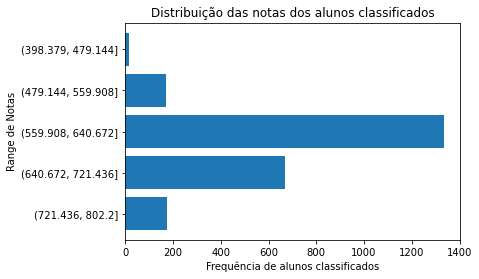

In [12]:
histograma_notas_classificados(lista_espera, 'Nota', 'Situação')

# Correlação

     - Para a correlação entre duas variáveis categóricas utilizamos a correlação V de Cramer

In [13]:
def correlacao_cramer(dataset, atrib_1, atrib_2):
    matriz_confusao = pd.crosstab(dataset[atrib_1], dataset[atrib_2])
    var_1 = matriz_confusao.columns.name
    var_2 = matriz_confusao.index.name
    matriz_cat_var = np.array(matriz_confusao)
    
    print('Matriz de confusão: {} x {}\n\n{}\n'.format(atrib_1, atrib_2, matriz_cat_var))
    
    X2 = chi2_contingency(matriz_cat_var, correction=False)[0]
    n = np.sum(matriz_cat_var)
    menor_dimensao = min(matriz_cat_var.shape)-1

    # Correlação de Cramer
    return np.sqrt((X2/n) / menor_dimensao)

In [14]:
correlacao_cramer(lista_espera, 'Categoria Concorrência', 'Situação')

Matriz de confusão: Categoria Concorrência x Situação

[[ 1229     0 25229]
 [  151    82  3211]
 [   15     0    50]
 [    5     0    30]
 [    6     0    28]
 [  458    18  5613]
 [  130   100  2587]
 [  368     4  2939]
 [    4     0    30]]



0.12391457008585047

In [15]:
correlacao_cramer(lista_espera, 'Unidade', 'Situação')

Matriz de confusão: Unidade x Situação

[[  123    20   658]
 [ 1701   101 33447]
 [   53    13   235]
 [  101    12   738]
 [  191    30   553]
 [  197    28  4086]]



0.12315372160268237

In [16]:
correlacao_cramer(lista_espera, 'Curso', 'Situação')

Matriz de confusão: Curso x Situação

[[  56    5 1909]
 [  53    0  558]
 [  17    4  115]
 [  17    0  631]
 [  26    3  335]
 [  21    3  196]
 [  16    0  344]
 [  92   10  921]
 [  19    4   59]
 [  18    3  135]
 [  12    2  154]
 [  17    1  293]
 [  15    1  209]
 [  38    2 1058]
 [  60   10  695]
 [  25    0  285]
 [  14    1  174]
 [  10    0  535]
 [  12    0  118]
 [   8    0  131]
 [   7    0  459]
 [  25    0  629]
 [  24    4  195]
 [ 101    0 2038]
 [  18    0  192]
 [  27    2  915]
 [  31    2  705]
 [  36    0 1928]
 [  19    2  146]
 [  30    3  152]
 [ 138   14  530]
 [  82    8  525]
 [  47    8  234]
 [  13    1  162]
 [  30    4  114]
 [  44    1  342]
 [  67    7  755]
 [   5    0  126]
 [  33    7   88]
 [  41    5  412]
 [  19    2  108]
 [  30    8   85]
 [  16    0  127]
 [  65    8  242]
 [  15    0  152]
 [  25    1  173]
 [  29    4  967]
 [   6    0   36]
 [  16    1  194]
 [  35    2  563]
 [  16    0 1048]
 [  11    0   73]
 [  18    1   88]
 [  11  

0.1713590252171186

# Teste de normalidade

In [17]:
def teste_normalidade(dataset):
    p_valores = []
    distancias = []
    D_menor_p = []
    
    notas_std = scipy.stats.zscore(dataset['Nota'])
    
    notas_std = notas_std.flatten()
    dist = getattr(scipy.stats, 'norm')
    param = dist.fit(notas_std)
    D, p = scipy.stats.kstest(notas_std, 'norm', args=param)
    p = np.around(p, 5) 
    D = np.around(D, 5)

    print ('Distância: {}\np-valor:{}\nD < p? {}'.format(D, p, D < p))

In [18]:
teste_normalidade(lista_espera)

Distância: 0.03471
p-valor:0.0
D < p? False


# *Best Fit Distribution*

In [19]:
nomes_distrib = ['beta', 'expon', 'gamma', 'lognorm', 'norm', 'pearson3', 't',\
              'triang', 'uniform', 'weibull_min', 'weibull_max']

def best_fit_distrib(dataset, nomes_distrib):
    p_valores = []
    distancias = []
    D_menor_p = []
    
    notas_std = scipy.stats.zscore(dataset['Nota'])
    notas_std = notas_std.flatten()
    
    for distribuicao in nomes_distrib:
        dist = getattr(scipy.stats, distribuicao)
        param = dist.fit(notas_std)

        if distribuicao != "norm":
            D, p = scipy.stats.kstest(notas_std, distribuicao, args=param)
        else:
            D, p = scipy.stats.kstest(notas_std, distribuicao,  alternative='greater')
            
        p = np.around(p, 5)
        p_valores.append(p)    
        D = np.around(D, 5)
        distancias.append(D)
        if D<p: 
            D_menor_p.append("yes") 
        else: 
            D_menor_p.append("no")

    resultados = pd.DataFrame()
    resultados['distribuicao'] = nomes_distrib
    resultados['distancias'] = distancias
    resultados['p_valor'] = p_valores
    resultados['D<p'] = D_menor_p
    
    resultados.sort_values(['p_valor'], ascending=False, inplace=True)


    print ('\nDistribuições ordenadas como best fit:')
    print ('----------------------------------------')
    print (resultados)

In [20]:
best_fit_distrib(lista_espera, nomes_distrib)


Distribuições ordenadas como best fit:
----------------------------------------
   distribuicao  distancias  p_valor  D<p
5      pearson3     0.00681  0.03940  yes
2         gamma     0.00681  0.03929  yes
10  weibull_max     0.00798  0.00912  yes
0          beta     0.00831  0.00582   no
3       lognorm     0.00856  0.00404   no
1         expon     0.34826  0.00000   no
4          norm     0.03471  0.00000   no
6             t     0.03472  0.00000   no
7        triang     0.08259  0.00000   no
8       uniform     0.21361  0.00000   no
9   weibull_min     0.03224  0.00000   no


# Gráficos

In [21]:
from plotnine import *

Gráfico da média de notas dos classificados por unidade


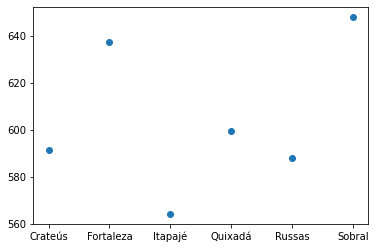

In [22]:
media_por_unidade = media_notas_por_atributo(lista_espera, 'Unidade')
media_classif_unidade = media_classificados_atributo(lista_espera, 'Unidade')
print('Gráfico da média de notas dos classificados por unidade')
grafico_linhas_unidade = plt.scatter(media_classif_unidade.keys(), media_classif_unidade.values())

Quantidade de candidatos inscritos em cada cota


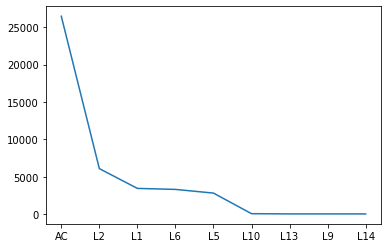

In [23]:
cotas = lista_espera['Categoria Concorrência'].value_counts()
cotas.rename({'Ampla Concorrência': 'AC'}, inplace=True)
print('Quantidade de candidatos inscritos em cada cota')
linhas_cotas = plt.plot(cotas.keys(), cotas.values)

### Gráfico com nota máxima e mínima por curso

##### Para o gráfico ficar legível vamos pegar apenas 15 cursos

In [24]:
cursos = np.unique(lista_espera['Curso'])[:15]
notas_min, notas_max = [], []
df_amp_notas = pd.DataFrame()
for curso in cursos:
    nota_min = min(lista_espera['Nota'][lista_espera['Curso'] == curso])
    nota_max = max(lista_espera['Nota'][lista_espera['Curso'] == curso])
    notas_min.append(nota_min)
    notas_max.append(nota_max)
df_amp_notas['Curso'] = np.array(cursos).T 
df_amp_notas['Nota Min'] = np.array(notas_min).T
df_amp_notas['Nota Max'] = np.array(notas_max).T

##### Usando o melt para juntar a Nota Min e Max na mesma coluna

In [25]:
notas_min_max = pd.melt(df_amp_notas, id_vars=['Curso'], value_vars=['Nota Min', 'Nota Max'],
                       var_name='Tipo variável', value_name='Nota')
notas_min_max.head()

,Curso,Tipo variável,Nota
0,Administração,Nota Min,355.32
1,Agronomia,Nota Min,391.40
2,Análise e Desenvolvimento de Sistemas,Nota Min,402.74
3,Arquitetura e Urbanismo,Nota Min,381.06
4,Biblioteconomia,Nota Min,379.86


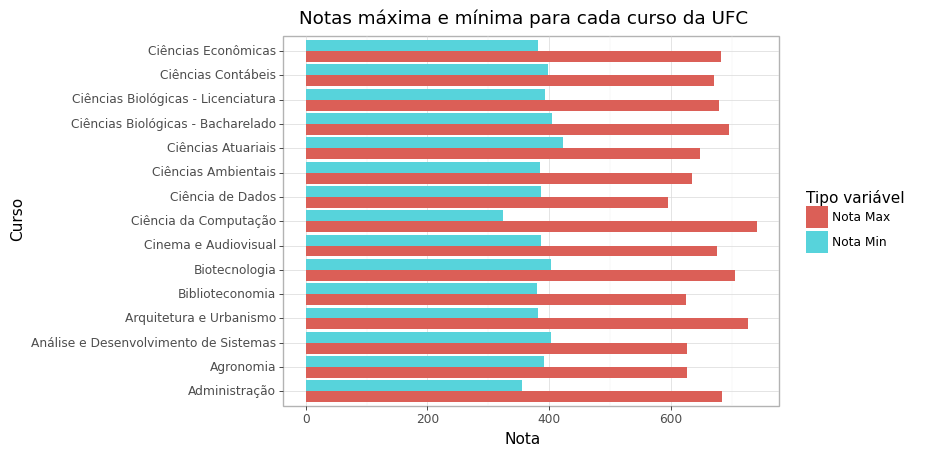

<ggplot: (131194041591)>

In [26]:
(ggplot(notas_min_max, aes('Curso', 'Nota', fill='Tipo variável'))
    + geom_bar(position='dodge', stat='identity')
    + scale_x_discrete(breaks=cursos)
    + coord_flip()
    + theme_light()
    + ggtitle('Notas máxima e mínima para cada curso da UFC')
)